# Hierarchical clustering

## What is clustering?
Cluster can be explained as group of something. where things that are indentical in some manner.
The process of partitioning same type of object into cluters is called clustering. 
i.e. Same type of vegetables are kept at the same place in the market.

## Where is the clustering used?
Clstering is usedby netflix to recommend movies based on the previously watched movies.

Flicker is also a good example of clustering where it groups similar type of photos together.

In buisnesses clustering is used for custmoer segmentation.
Document classification.

## Types of clustering-
#### 1. Exclusive clstering
#### 2. Overlapping clustering
#### 3. Hierarchical clustering


## What is Hierarchical clustering?
#### Hierarchical clustering-  
Hierarchical clustering is a classification algorithm which groups together similar kind of objects into clusters. 
In hierarchical clustering, various clusters belong to some other parent cluster.
In the following diagram we can see that "A" and "B" belong to same cluster. But this cluster is a part of cluster "E" . And both the cluster "E" and "F" belong to cluster "G".

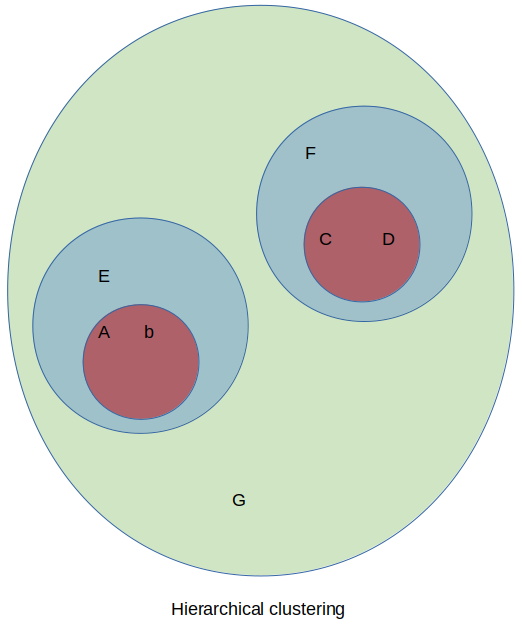

## Subtypes of HIerarchical clustering-
#### 1. Divisive method- 
This is also called top-down clustering method. In this method we assign all of the observations to a single cluster and then separate the cluster into two least similar clusters. Then, we proceed recursively on each cluster until there is one cluster for each observation. The divisive algorithms is more accurate than agglomerative  algorithms.
#### 2. Agglomerative method
This method is also caled bottom-up clustering.In this method we assign each observation to its own cluster. Then, compute the similarities between each of the clusters and join the two most similar clusters. Finally,repeate the above process until there is only a single cluster left. 


## Python implementation of ierarchical clustering

In [47]:

from sklearn import datasets

iris = datasets.load_iris()

In [48]:

from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
# Ward is the default linkage algorithm, so we'll start with that
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(iris.data)

In [49]:
# Hierarchical clustering using complete linkage
# TODO: Create an instance of AgglomerativeClustering with the appropriate parameters
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
# Fit & predict
# TODO: Make AgglomerativeClustering fit the dataset and predict the cluster labels
complete_pred = complete.fit_predict(iris.data)

# Hierarchical clustering using average linkage
# TODO: Create an instance of AgglomerativeClustering with the appropriate parameters
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
# Fit & predict
# TODO: Make AgglomerativeClustering fit the dataset and predict the cluster labels
avg_pred = avg.fit_predict(iris.data)

In [50]:

from sklearn.metrics import adjusted_rand_score

ward_ar_score = adjusted_rand_score(iris.target, ward_pred)

In [51]:

# TODO: Calculated the adjusted Rand score for the complete linkage clustering labels
complete_ar_score = adjusted_rand_score(iris.target, complete_pred)

# TODO: Calculated the adjusted Rand score for the average linkage clustering labels
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

In [52]:

print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.7311985567707745 
Complete:  0.64225125183629 
Average:  0.7591987071071522


In [35]:

from sklearn import preprocessing

normalized_X = preprocessing.normalize(iris.data)
normalized_X[:10]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

In [36]:

# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

# Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values
# Pick the one that resulted in the highest Adjusted Rand Score
linkage_type = 'ward'

linkage_matrix = linkage(normalized_X, linkage_type)

In [37]:

ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(normalized_X)

complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
complete_pred = complete.fit_predict(normalized_X)

avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg_pred = avg.fit_predict(normalized_X)


ward_ar_score = adjusted_rand_score(iris.target, ward_pred)
complete_ar_score = adjusted_rand_score(iris.target, complete_pred)
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.8856970310281228 
Complete:  0.644447235392006 
Average:  0.5583714437541352


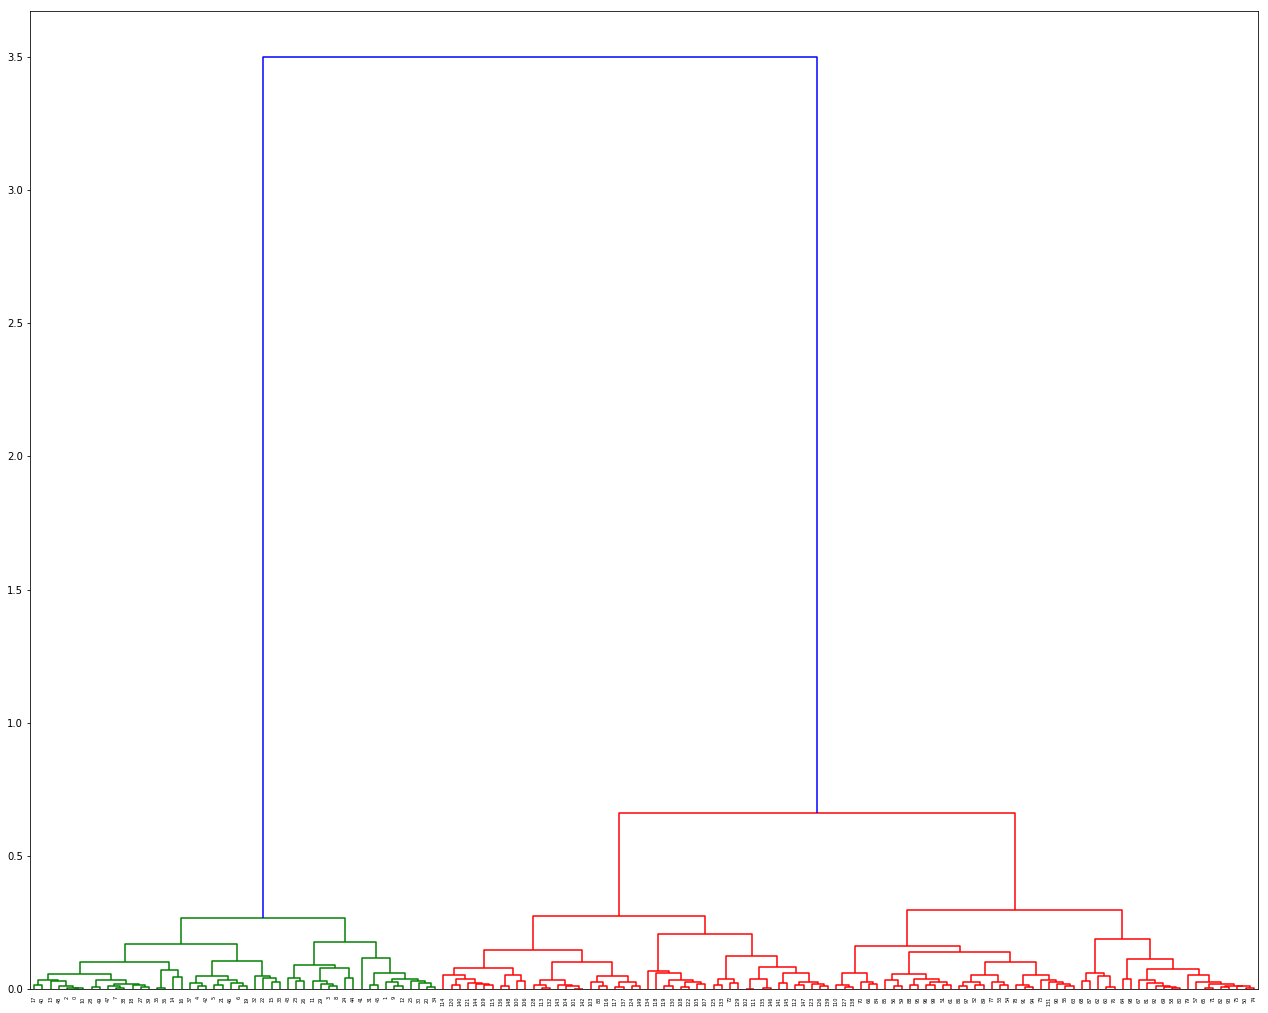

In [38]:

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(22,18))

# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()